In [9]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
import time
%matplotlib inline

In [10]:
TRAINF = 'training.csv'
TESTF = 'test.csv'
FLOOKUP = 'IdLookupTable.csv'
def load2d(test = False, cols = None):
    filename = TESTF if test else TRAINF
    df = pd.read_csv(filename)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    if test==False and len(cols)>0:
        df = df[list(cols) + ['Image']]
    print(df.count())
    df = df.dropna()
    X = np.vstack(df['Image'].values).astype(np.float32) / 255.0
    if not test:
        y = df[df.columns[:-1]].values.astype(np.float32)
        y = (y - 48.0) / 48.0
        X, y = shuffle(X, y, random_state = 0)
    else:
        y = None
    X = X.reshape(-1, 1, 96, 96)
    
    return X, y
    

In [21]:
def plot_sample(x, y):
    img = x.reshape(96, 96)
    plt.imshow(img, cmap='gray')
    plt.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)


In [5]:
x, y = load2d(test=False, cols=[])

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [24]:
import keras

Using TensorFlow backend.


In [23]:
y[1]


array([ 0.42022958, -0.22094734, -0.40088037, -0.24232538,  0.26627755,
       -0.21666987,  0.54425842, -0.18245935, -0.2640287 , -0.23377037,
       -0.55056459, -0.22094734,  0.15432532, -0.38092825,  0.69821054,
       -0.32357892, -0.21698563, -0.38773206, -0.70024878, -0.36635408,
       -0.05020094,  0.12118658,  0.32186604,  0.64293784, -0.38377035,
        0.62155026, -0.05874642,  0.54029673, -0.06302389,  0.84821051], dtype=float32)

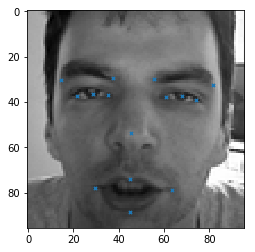

In [22]:
plot_sample(x[1][0], y[1])